# Importing Data 

Once the data is successfuly downloaded from [https://gea.esac.esa.int/archive/](https://gea.esac.esa.int/archive/), and correctly decompressed following the instroctions provided in [Neeed to add link to README from personal github](add-link), we can now import the data on Python and store it as a data frame using the package [pandas](https://pandas.pydata.org/).

Optional, add the following to the sql code to remove impurity in data:
```sql
WHERE gs.parallax < 5 * gs.parallax_error  -- Remove potential stars
AND gs.ruwe < 1.4  -- Ensure good astrometric quality
AND gs.phot_g_mean_mag < 21  -- Bright enough for good measurements
```

In [1]:
from src.data import data_download # Run Python file to download data

INFO: Query finished. [astroquery.utils.tap.core]


In [7]:
import pandas as pd
# Load into Pandas
df = pd.read_csv("qso_full_data.csv")
print(df.head())  # Check the data

        source_id         ra       dec      pmra     pmdec  parallax  \
0   3470333738112  45.075505  0.152316 -1.072371 -3.191011  0.366321   
1   5944234902272  44.884761  0.164806 -0.121274  0.725026 -0.395659   
2   6459630980096  44.910498  0.189649  0.217806 -0.316007 -0.626561   
3   9517648372480  45.254655  0.228999 -0.552941 -1.895446 -0.917219   
4  10892037246720  45.188575  0.282424 -0.098037 -0.120580  0.001630   

   parallax_error      ruwe  phot_g_mean_mag  nu_eff_used_in_astrometry  \
0        0.901633  0.889714        20.571114                   1.526179   
1        1.340139  1.087911        20.704517                   1.647388   
2        0.548536  1.020956        20.173105                        NaN   
3        1.507964  1.031971        20.634562                        NaN   
4        0.246332  0.974657        18.787239                   1.565118   

   pmra_error  pmdec_error  pmra_pmdec_corr  astrometric_params_solved  
0    1.552507     1.226259         0.207769

### Column Content

Before we procede, we need to understand what each column contains, to do so let us print the heading of each column.

In [8]:
# Check column names
print(df.columns)

Index(['source_id', 'ra', 'dec', 'pmra', 'pmdec', 'parallax', 'parallax_error',
       'ruwe', 'phot_g_mean_mag', 'nu_eff_used_in_astrometry', 'pmra_error',
       'pmdec_error', 'pmra_pmdec_corr', 'astrometric_params_solved'],
      dtype='object')


The output above, displays:

1. <b>source_id</b>, Unique Gaia identifier for the object
2. <b>ra</b>, Right Ascension (celestial longitude) in degrees
3. <b>dec</b>, Declination (celestial latitude) in degrees
4. <b>pmra</b>, Proper motion in Right Ascension (mas/yr)
5. <b>pmdec</b>, Proper motion in Declination (mas/yr)
6. <b>parallax</b>, Parallax measurament (this is expected to be near zero for distant QSOs)
7. <b>ruwe</b>, Renormalised Unit Weight Error (this indicates the quality of the data point)
8. <b>phot_g_mean_mag</b>, Mean magnitude in Gaia's G-band 
9. <b>nu_eff_used_in_astrometry</b>, Efficient wavenumber denoted as $\nu_{eff}$, this is used to charecterise the color of a celestial object by describing how its light is distributed across different wavelenghts.
10. <b>parallax_error</b>, measure the uncentainty on parralax (standard deviation).
11. <b>pmra_error</b>, Uncertainty in pmra.
12. <b>pmdec_error</b>, Uncertainty in pmdec_error.

We want to make suere the data matches the description provided in the papaer, i.e. we expect there to be 1614173 sources which are identified as QSO-like objects. 

In [9]:
# Display the shape of the dataset
df.shape

(1614173, 14)

As expected, the above output confirms that there are 1614173 QSO-like objects in the dataset.

# Visualising Data

In this section we are going to reproduce some of the plots presented in the paper [Gaia Early Data Realease 3, Acceleration of the Solar System from Gaia astrometry](https://www.aanda.org/articles/aa/full_html/2021/05/aa39734-20/aa39734-20.html). 

<b>Efficient wavenumber $\nu_{eff}$</b> distribution visualisation:

In [10]:
df

,source_id,ra,dec,pmra,pmdec,parallax,parallax_error,ruwe,phot_g_mean_mag,nu_eff_used_in_astrometry,pmra_error,pmdec_error,pmra_pmdec_corr,astrometric_params_solved
0,3470333738112,45.075505,0.152316,-1.072371,-3.191011,0.366321,0.901633,0.889714,20.571114,1.526179,1.552507,1.226259,0.207769,31
1,5944234902272,44.884761,0.164806,-0.121274,0.725026,-0.395659,1.340139,1.087911,20.704517,1.647388,1.482424,1.402002,0.285303,31
2,6459630980096,44.910498,0.189649,0.217806,-0.316007,-0.626561,0.548536,1.020956,20.173105,NaN,0.679419,0.608799,0.260906,95
3,9517648372480,45.254655,0.228999,-0.552941,-1.895446,-0.917219,1.507964,1.031971,20.634562,NaN,1.988008,1.378176,0.212472,95
4,10892037246720,45.188575,0.282424,-0.098037,-0.120580,0.001630,0.246332,0.974657,18.787239,1.565118,0.257395,0.223107,0.164329,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1614168,6917502467565029248,314.977133,-0.321496,-0.047599,0.103747,-0.127926,0.215991,1.062087,18.545496,NaN,0.226686,0.139130,0.105096,95
1614169,6917504597868798592,315.163726,-0.331603,-0.301592,0.201947,-0.421531,0.346653,1.013019,19.289822,NaN,0.407946,0.251676,-0.077387,95
1614170,6917504769667500416,315.164733,-0.320391,-0.689676,-0.304574,0.267887,0.589744,0.983724,19.866022,NaN,0.648754,0.440534,0.056347,95
1614171,6917523049047067648,315.119522,-0.165171,0.982301,-0.305680,-0.000245,0.719941,0.983996,19.976761,NaN,0.940451,0.403836,-0.153113,95


Separating 5 parmater soultions and 6 parameter soultions

In [11]:
df_5param = df[df["astrometric_params_solved"]==31]
df_6param = df[df["astrometric_params_solved"]==95]

In [12]:
# Checking dimentisons
print(df_5param.shape)
print(df_6param.shape)

(1215942, 14)
(398231, 14)


As we can see from the above output, we have succesfully separated the data into 5 and 6 parameters solutions. In the paper it is reported that the 5 parameters solution dataset is of size 1215942, and 6 parameters solution data set of size 398231, which is what we observe from the above output.

Five-parameter solutions

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Collecting columns individually from dataset df
data_nu_eff = df_5param['nu_eff_used_in_astrometry'].dropna()
data_G = df_5param['phot_g_mean_mag'].dropna()
data_RUWE = df_5param['ruwe'].dropna()

In [16]:
print(data_nu_eff)

0          1.526179
1          1.647388
4          1.565118
5          1.613716
6          1.584296
             ...   
1614100    1.619118
1614101    1.622210
1614109    1.653227
1614114    1.502613
1614149    1.617653
Name: nu_eff_used_in_astrometry, Length: 1215942, dtype: float64


Text(0, 0.5, 'Count')

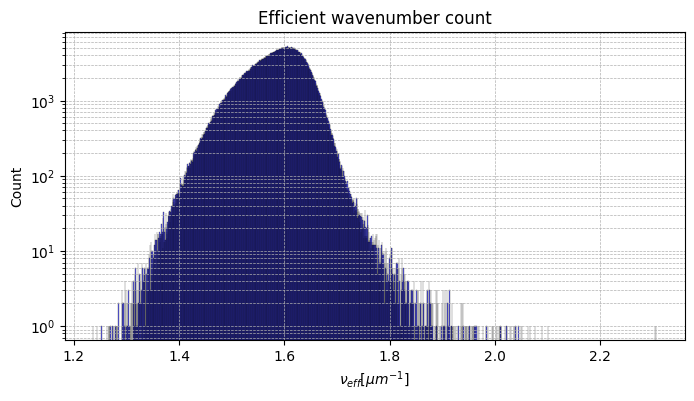

In [17]:
plt.figure(figsize=(8, 4))
plt.hist(data_nu_eff, bins=2000, density=False, alpha=0.6, histtype='bar', color = 'b',edgecolor='black', linewidth=0.3)
plt.yscale('log')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  
plt.title('Efficient wavenumber count')
plt.xlabel(r'$\nu_{eff}[\mu m^{-1}]$')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

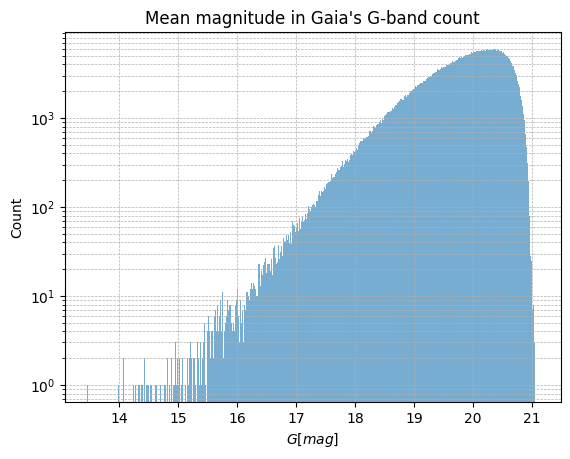

In [18]:
plt.hist(data_G, bins=1000, density=False, alpha=0.6, histtype='bar', log=True)
plt.grid(True, which='both', linestyle='--', linewidth=0.5) 
plt.title('''Mean magnitude in Gaia's G-band count''')
plt.xlabel(r'$G[mag]$')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

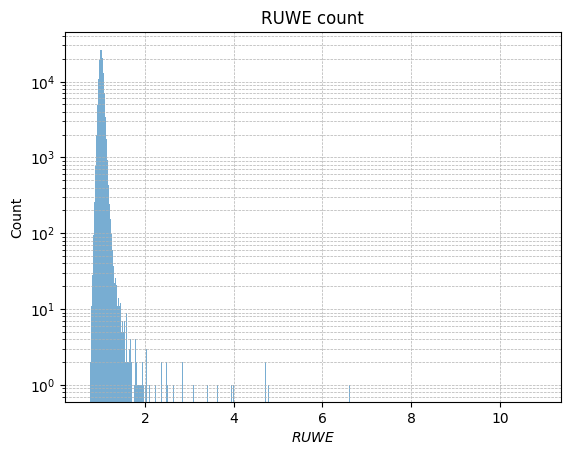

In [19]:
plt.hist(data_RUWE, bins=4000, density=False, alpha=0.6, histtype='bar', log = True)
#plt.yscale('log')
plt.grid(True, which='both', linestyle='--', linewidth=0.5) 
plt.title('''RUWE count''')
plt.xlabel(r'$RUWE$')
plt.ylabel('Count')

Six-parameter solution

In [20]:
# Parrallax, mean and uncertainty
data_parallaxes = df_6param['parallax']
parallax_mean = df_6param['parallax'].mean()
parallax_std = df_6param['parallax'].std()
data_par_error = df_6param['parallax_error']

# Proper motion Right Ascension, mean and uncertainty
data_pmra = df_6param['pmra']
pmra_mean = df_6param['pmra'].mean()
pmra_std = df_6param['pmra'].std()
data_pmra_er = df_6param['pmra_error']

# Proper motion Declination, mean and uncertainty
data_pmdec = df_6param['pmdec']
pmdec_mean = df_6param['pmdec'].mean()
pmdec_std = df_6param['pmdec'].std()
data_pmdec_error = df_6param['pmdec_error']

Parallax, pmra \& pmdec normalised histogram plots

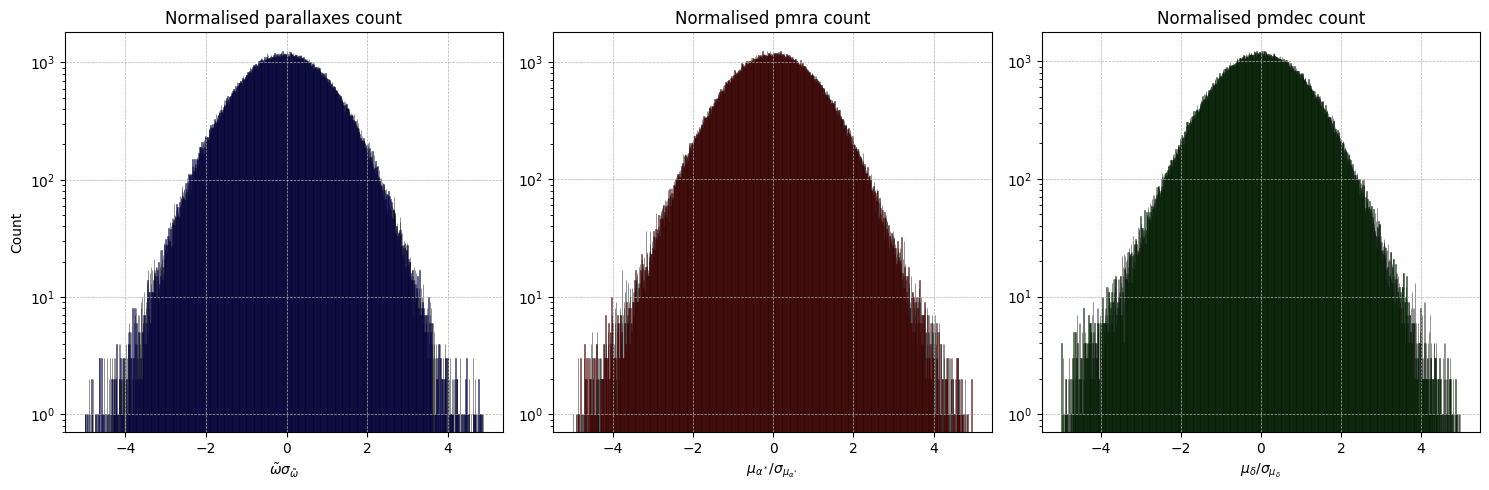

In [21]:
import numpy as np
import matplotlib.pyplot as plt

data1 = (data_parallaxes)/data_par_error  
data2 = (data_pmra)/data_pmra_er
data3 = (data_pmdec)/data_pmdec_error

no_bins = 1250


fig, axes = plt.subplots(1, 3, figsize=(15, 5))  

# Parallax
axes[0].hist(data1, bins=no_bins, alpha=0.6, color='b', edgecolor='black', linewidth=0.5, log=True)
axes[0].set_title('Normalised parallaxes count')
axes[0].set_xlabel(r'$\tilde{\omega}\sigma_{\tilde{\omega}}$')
axes[0].set_ylabel('Count')
axes[0].grid(True, linestyle='--', linewidth=0.5)

# Pmra
axes[1].hist(data2, bins=no_bins, alpha=0.6, color='r', edgecolor='black', linewidth=0.5, log=True)
axes[1].set_title('Normalised pmra count')
axes[1].set_xlabel(r'$\mu_{\alpha^*}/\sigma_{\mu_{\alpha^*}}$')
axes[1].grid(True, linestyle='--', linewidth=0.5)

# Pmdec
axes[2].hist(data3, bins=no_bins, alpha=0.6, color='g', edgecolor='black', linewidth=0.5, log=True)
axes[2].set_title('Normalised pmdec count')
axes[2].set_xlabel(r'$\mu_{\delta}/\sigma_{\mu_{\delta}}$')
axes[2].grid(True, linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


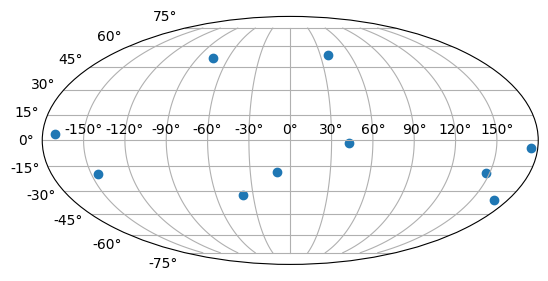

In [22]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
plt.subplot(111, projection="mollweide")
plt.grid(True)

objects = np.random.choice(np.arange(len(df)), 10, replace=False)

ra = df.ra.to_numpy()[objects] / 180 * np.pi - np.pi
dec = df.dec.to_numpy()[objects] / 180 * np.pi

plt.scatter(ra, dec)

plt.show()

In [23]:
np.max(ra)

np.float64(3.058512313775328)

/tmp/ipykernel_1350/419993969.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_5param["statistical_weight"] = 1 / (df_5param["pmra_error"]**2) + 1 / (df_5param["pmdec_error"]**2)


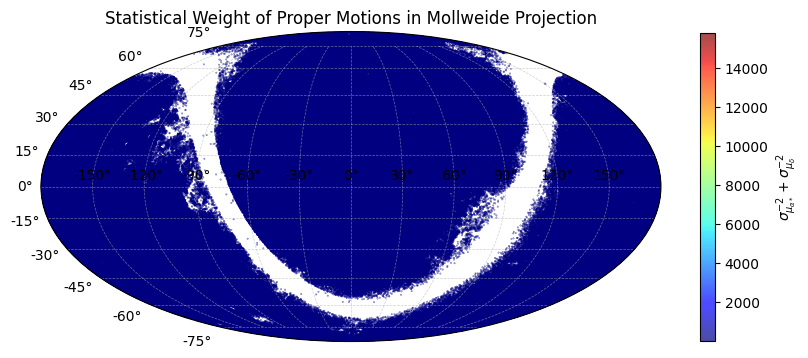

In [ ]:
# Compute statistical weight
df_5param["statistical_weight"] = 1 / (df_5param["pmra_error"]**2) + 1/(df_5param["pmdec_error"]**2)

# Convert RA/Dec for Mollweide projection
ra = np.radians(df_5param["ra"].values) - np.pi 
dec = np.radians(df_5param["dec"].values) # Convert to radians

# Normalize statistical weight for color mapping
weights = df_5param["statistical_weight"].values
#weights = weights / np.max(weights)  # Normalize between 0 and 1

# Create Mollweide plot
plt.figure(figsize=(10, 5))
ax = plt.subplot(111, projection="mollweide")

# Scatter plot with color mapping based on statistical weight
sc = ax.scatter(ra, dec, c=weights, cmap="jet", s=0.1, alpha=0.7)

# Add colorbar
cbar = plt.colorbar(sc, orientation="vertical", shrink=0.8, pad=0.05)
cbar.set_label(r"$\sigma_{\mu_{\alpha*}}^{-2} + \sigma_{\mu_{\delta}}^{-2}$")

# Add grid and title
ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.6)
plt.title("Statistical Weight of Proper Motions in Mollweide Projection")

# Show plot
plt.show()

In [25]:
print(df_5param["statistical_weight"].isna().sum())  # Check for NaNs
print(df_5param.shape)  # See if data is unexpectedly small


0
(1215942, 15)


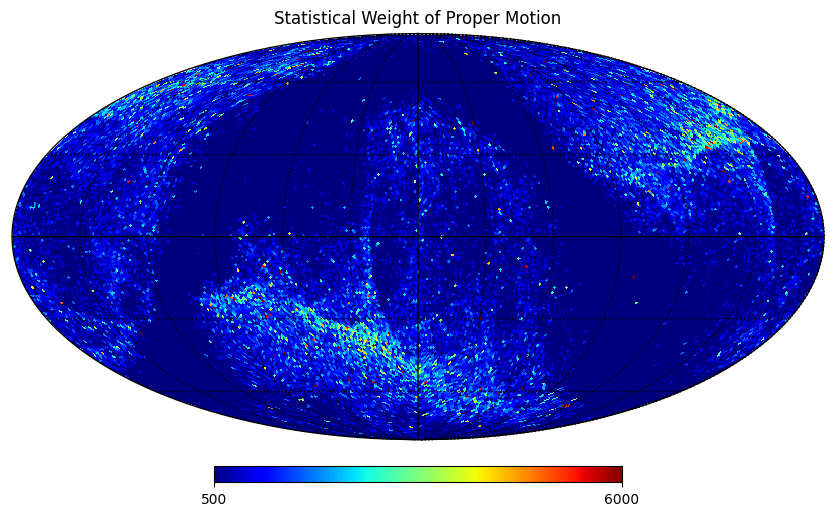

In [26]:
import healpy as hp

# HEALPix resolution
NSIDE = 64  # HEALPix level 6

# Convert RA/Dec to HEALPix pixels
pixels = hp.ang2pix(NSIDE, df_5param["ra"].values, df_5param["dec"].values, lonlat=True)

# Aggregate statistical weight per HEALPix pixel
weights_map = np.bincount(pixels, weights=df_5param["statistical_weight"], minlength=hp.nside2npix(NSIDE))

# Plot the HEALPix map
hp.mollview(weights_map, cmap="jet", min=500, max=6000, title="Statistical Weight of Proper Motion")
hp.graticule()
plt.show()


In [27]:
df.ra.to_numpy()

array([ 45.07550473,  44.8847607 ,  44.91049781, ..., 315.16473331,
       315.11952154, 314.92349873], shape=(1614173,))

/tmp/ipykernel_1350/2010943051.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_5param["statistical_weight"] = 1 / (df_5param["pmra_error"]**2) + 1 / (df_5param["pmdec_error"]**2)


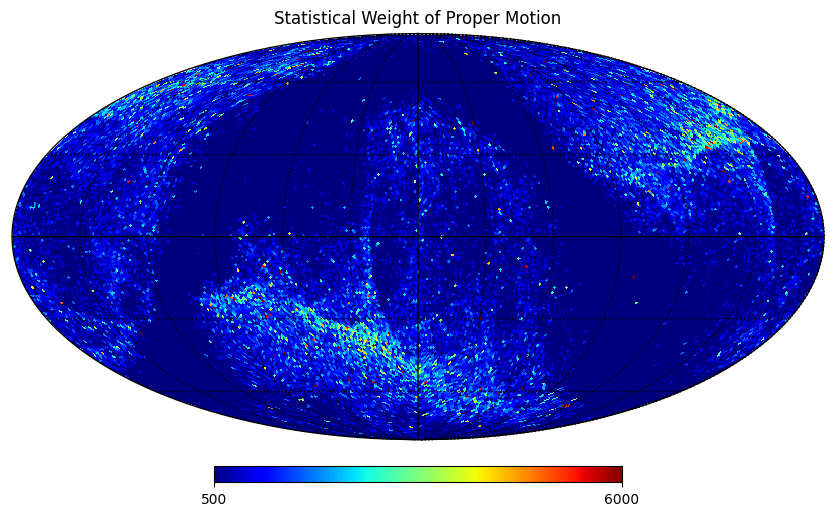

In [28]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt


# Compute statistical weight: W = σ_pmra^-2 + σ_pmdec^-2
df_5param["statistical_weight"] = 1 / (df_5param["pmra_error"]**2) + 1 / (df_5param["pmdec_error"]**2)

# Convert RA/Dec to HEALPix pixels
NSIDE = 64  # HEALPix resolution (level 6)
pixels = hp.ang2pix(NSIDE, df_5param["ra"].values, df_5param["dec"].values, lonlat=True)

# Aggregate statistical weight per HEALPix pixel
weights_map = np.bincount(pixels, weights=df_5param["statistical_weight"], minlength=hp.nside2npix(NSIDE))

# Plot the HEALPix map
hp.mollview(weights_map, cmap="jet", min=500, max=6000, title="Statistical Weight of Proper Motion")
hp.graticule()

# Show the plot
plt.show()


In [ ]:
# Checking 

In [ ]:
import jax 
import jax.numpy as jnp
import math
from jax import jit
from functools import partial, lru_cache
from src.models.vsh_model import*
from jax import random
from src.models.configuration import*

# Toy Model \& Generated Data

In [2]:
# Choose fixed t_lm and s_lm values (mas/yr)
theta = jnp.array([
    -0.2,   # t_10
     0.05,  # Re(t_11)
     0.01,  # Im(t_11)
     0.3,   # s_10
    -0.04,  # Re(s_11)
     0.02   # Im(s_11)
])

# Generate N random points on the sphere (RA, Dec in radians)
key = random.PRNGKey(0)
N = 5000

ra = random.uniform(key, shape=(N,), minval=0.0, maxval=2 * jnp.pi)
dec = jnp.arcsin(random.uniform(key, shape=(N,), minval=-1.0, maxval=1.0))  # uniform on sphere

data = jnp.stack([ra, dec])  # shape (2, N)

# Use model to get proper motion vectors, then project to RA/Dec components
mu_alpha = []
mu_delta = []

for i in range(N):
    alpha_i = ra[i]
    delta_i = dec[i]
    e_a, e_d = basis_vectors(alpha_i, delta_i)

    V = toy_model_l_1(alpha_i, delta_i, theta, grid=False)
    mu_alpha.append(jnp.vdot(V, e_a).real)
    mu_delta.append(jnp.vdot(V, e_d).real)

mu_alpha = jnp.array(mu_alpha)  # shape (N,)
mu_delta = jnp.array(mu_delta)

# Add Gaussian noise
noise_level = 0.03  # mas/yr
key1, key2 = random.split(key)
mu_alpha_noisy = mu_alpha + random.normal(key1, shape=(N,)) * noise_level
mu_delta_noisy = mu_delta + random.normal(key2, shape=(N,)) * noise_level

# Pack into obs and error arrays
obs = jnp.stack([mu_alpha_noisy, mu_delta_noisy])  # shape (2, N)
error = jnp.stack([
    jnp.ones(N) * noise_level,       # pmra_error
    jnp.ones(N) * noise_level,       # pmdec_error
    jnp.zeros(N)                    # pmra_pmdec_corr
])

Define least square (see Eq. 7)

Use iminuit

In [3]:
from iminuit import Minuit


# Bind fixed arguments into a new function
bound_least_square = partial(toy_least_square, data, obs, error)

# Now Minuit only sees the 6 free parameters
m = Minuit(bound_least_square,
           t_10=0.0, t_11r=0.0, t_11i=0.0,
           s_10=0.0, s_11r=0.0, s_11i=0.0)

m.errordef=Minuit.LEAST_SQUARES
lim = 1.2
m.limits['t_10'] = (-lim,lim)
m.limits['t_11r'] = (-lim,lim)
m.limits['t_11i'] = (-lim,lim)
m.limits['s_10'] = (-lim,lim)
m.limits['s_11r'] = (-lim,lim)
m.limits['s_11i'] = (-lim,lim)

m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.028e+04                  │             Nfcn = 1258              │
│ EDM = 0.00189 (Goal: 0.0002)     │            time = 4.1 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           ABOVE call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│           Hesse FAILED           │           ABOVE call limit           │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ t_10  │-1.9775e-1 │ 0.0000e-1 │            │            │  -1.2   │   1.2   │       │
│ 1 │ t_11r │ 5.0282e-2 │ 0.0000e-2 │            │            │  -1.2   │   1.2   │       │
│ 2 │ t_11i │ 1.6526e-2 │ 0.0000e-2 │            │            │  -1.2   │   1.2   │       │
│ 3 │ s_10  │ 2.9948e-1 │ 0.0000e-1 │            │            │  -1.2   │   1.2   │       │
│ 4 │ s_11r │-4.0785e-2 │ 0.0000e-2 │            │            │  -1.2   │   1.2   │       │
│ 5 │ s_11i │ 1.6186e-2 │ 0.0000e-2 │            │            │  -1.2   │   1.2   │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘

In [4]:
theta_fit = jnp.array([m.values[k] for k in m.parameters])
print(theta_fit)
print(theta)

[-0.1977529   0.05028246  0.01652588  0.29948458 -0.04078477  0.01618575]
[-0.2   0.05  0.01  0.3  -0.04  0.02]


### Optimised

# Full dataset

In [5]:
import pandas as pd
df_loaded = pd.read_csv("qso_full_data.csv")
df = df_loaded[df_loaded["astrometric_params_solved"]==31]

In [19]:
# Preparing dataset
ra_rad = jnp.deg2rad(jnp.array(df["ra"].values))
dec_rad = jnp.deg2rad(jnp.array(df["dec"].values))

# Group as [ra, dec] shape = (2, N)
angles = jnp.stack([ra_rad, dec_rad])

# Prepare observed proper motions
pmra = jnp.array(df["pmra"].values)
pmdec = jnp.array(df["pmdec"].values)

# Group as [pmra, pmdec] shape = (2, N)
obs = jnp.stack([pmra, pmdec])

# Prepare error
pmra_error = jnp.array(df["pmra_error"].values)
pmdec_error = jnp.array(df["pmdec_error"].values)
corr = jnp.array(df["pmra_pmdec_corr"].values)

# Group as [pmra_error, pmdec_error, pmra_pmdec_corr] shape = (3, N)
error = jnp.stack([pmra_error, pmdec_error, corr])

In [7]:
# Bind fixed arguments into a new function
bound_least_square = partial(toy_least_square, data, obs, error)

# Now Minuit only sees the 6 free parameters
m = Minuit(bound_least_square,
           t_10=0.0, t_11r=0.0, t_11i=0.0,
           s_10=0.0, s_11r=0.0, s_11i=0.0)

m.errordef=Minuit.LEAST_SQUARES
lim = 1.2
m.limits['t_10'] = (-lim,lim)
m.limits['t_11r'] = (-lim,lim)
m.limits['t_11i'] = (-lim,lim)
m.limits['s_10'] = (-lim,lim)
m.limits['s_11r'] = (-lim,lim)
m.limits['s_11i'] = (-lim,lim)

m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.728e+06                  │             Nfcn = 1327              │
│ EDM = 9.03 (Goal: 0.0002)        │            time = 6.5 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │   ABOVE EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ t_10  │  -3.1e-3  │  0.9e-3   │            │            │  -1.2   │   1.2   │       │
│ 1 │ t_11r │  -0.0100  │  0.0012   │            │            │  -1.2   │   1.2   │       │
│ 2 │ t_11i │  -0.0055  │  0.0011   │            │            │  -1.2   │   1.2   │       │
│ 3 │ s_10  │  -4.8e-3  │  0.8e-3   │            │            │  -1.2   │   1.2   │       │
│ 4 │ s_11r │  0.0008   │  0.0012   │            │            │  -1.2   │   1.2   │       │
│ 5 │ s_11i │  0.0207   │  0.0011   │            │            │  -1.2   │   1.2   │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────────────────────────────┐
│       │     t_10    t_11r    t_11i     s_10    s_11r    s_11i │
├───────┼───────────────────────────────────────────────────────┤
│  t_10 │ 8.43e-07   0.3e-6   0.2e-6        0       -0       -0 │
│ t_11r │   0.3e-6 1.48e-06   0.1e-6        0       -0        0 │
│ t_11i │   0.2e-6   0.1e-6 1.27e-06        0       -0       -0 │
│  s_10 │        0        0        0  6.7e-07   0.1e-6        0 │
│ s_11r │       -0       -0       -0   0.1e-6 1.55e-06   0.1e-6 │
│ s_11i │       -0        0       -0        0   0.1e-6 1.28e-06 │
└───────┴───────────────────────────────────────────────────────┘

In [8]:
theta_fit = jnp.array([m.values[k] for k in m.parameters])
print(theta_fit)

[-0.00306906 -0.01004912 -0.00546359 -0.00483699  0.00078733  0.02068464]


Now convert to physical vectors!

Using the spherical harmonic definitions to extract the:
- Rotation vector $\vec{R}$ from $t_{1m}$
- Acceleration vector $\vec{G}$ from $s_{1m}$

In [9]:
chi2 = m.fval
ndof = 1215942*2 - 6
chi2_red = chi2 / ndof
print(chi2_red) # if chi2_red ~ 1 good fit

1.1218120316890896


In [10]:
result = spheroidal_vector_summary(theta_fit[3], theta_fit[4], theta_fit[5])
result

{'G_vector (mas/yr)': Array([-0.00038469, -0.01010657, -0.00167115], dtype=float32),
 'Magnitude (μas/yr)': Array(10.251023, dtype=float32),
 'RA (deg)': Array(267.8202, dtype=float32),
 'Dec (deg)': Array(-9.382405, dtype=float32)}

In [11]:
result = toroidal_vector_summary(theta_fit[0], theta_fit[1], theta_fit[3])
result

{'R_vector (mas/yr)': Array([ 0.00491002,  0.00236337, -0.00106034], dtype=float32),
 'Magnitude (μas/yr)': Array(5.551411, dtype=float32),
 'RA (deg)': Array(25.703138, dtype=float32),
 'Dec (deg)': Array(-11.011398, dtype=float32)}

# For Albitrary Choice of $l_{max}$

### Generate Fake Data 

In [12]:
def generate_random_theta(lmax, amplitude=0.01, seed=0):
    key = jax.random.PRNGKey(seed)
    n_params = count_vsh_coeffs(lmax)
    theta = jax.random.uniform(key, shape=(n_params,), minval=-amplitude, maxval=amplitude)
    return theta


In [13]:
lmax = 1
# Choose fixed t_lm and s_lm values (mas/yr)
theta = generate_random_theta(lmax, amplitude=0.3, seed=0)

key = random.PRNGKey(0)

# Generate N random points on the sphere (RA, Dec in radians)
N = 5000

ra = random.uniform(key, shape=(N,), minval=0.0, maxval=2 * jnp.pi)
dec = jnp.arcsin(random.uniform(key, shape=(N,), minval=-1.0, maxval=1.0))  # uniform on sphere

data = jnp.stack([ra, dec])  # shape (2, N)

# Use model to get proper motion vectors, then project to RA/Dec components
mu_alpha = []
mu_delta = []

for i in range(N):
    alpha_i = ra[i]
    delta_i = dec[i]
    e_a, e_d = basis_vectors(alpha_i, delta_i)

    V = model_vsh(alpha_i, delta_i, theta, lmax, grid=False)
    mu_alpha.append(jnp.vdot(V, e_a).real)
    mu_delta.append(jnp.vdot(V, e_d).real)

mu_alpha = jnp.array(mu_alpha)  # shape (N,)
mu_delta = jnp.array(mu_delta)

# Add Gaussian noise
noise_level = 0.03  # mas/yr
key1, key2 = random.split(key)
mu_alpha_noisy = mu_alpha + random.normal(key1, shape=(N,)) * noise_level
mu_delta_noisy = mu_delta + random.normal(key2, shape=(N,)) * noise_level

# Pack into obs and error arrays
obs = jnp.stack([mu_alpha_noisy, mu_delta_noisy])  # shape (2, N)
error = jnp.stack([
    jnp.ones(N) * noise_level,       # pmra_error
    jnp.ones(N) * noise_level,       # pmdec_error
    jnp.zeros(N)                    # pmra_pmdec_corr
])

# $l=1$

In [14]:
lmax = 1
total_params = count_vsh_coeffs(lmax) 

In [34]:
# Flat vector theta: [t10, ..., t_lmaxm, s10, ..., s_lmaxm]
theta_init = jnp.zeros(total_params)
limits = vsh_minuit_limits(lmax=1, t_bound=0.01, s_bound=0.0085)
# Fix everything except theta
#bound_least_square = partial(least_square, data, obs, error, lmax=lmax, grid=False)

def least_square_wrapper(*theta_flat):
    theta = jnp.array(theta_flat)  # reconstructs the vector from scalars
    return least_square(angles, obs, error, theta, lmax=lmax, grid=False)


m = Minuit(least_square_wrapper, *theta_init)

m.errordef = Minuit.LEAST_SQUARES
for i, name in enumerate(m.parameters):
    m.limits[name] = limits[name]


m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.728e+06                  │             Nfcn = 1157              │
│ EDM = 1.6 (Goal: 0.0002)         │            time = 4.6 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │   ABOVE EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x0   │  -3.2e-3  │  1.0e-3   │            │            │  -0.01  │  0.01   │       │
│ 1 │ x1   │  -5.4e-3  │  0.8e-3   │            │            │ -0.0085 │ 0.0085  │       │
│ 2 │ x2   │  -9.9e-3  │  0.5e-3   │            │            │  -0.01  │  0.01   │       │
│ 3 │ x3   │  -0.0056  │  0.0012   │            │            │  -0.01  │  0.01   │       │
│ 4 │ x4   │  -0.0006  │  0.0013   │            │            │ -0.0085 │ 0.0085  │       │
│ 5 │ x5   │  8.50e-3  │  0.05e-3  │            │            │ -0.0085 │ 0.0085  │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬─────────────────────────────────────────────────────────────┐
│    │        x0        x1        x2        x3        x4        x5 │
├────┼─────────────────────────────────────────────────────────────┤
│ x0 │  9.59e-07    0.1e-6   0.17e-6    0.3e-6        -0  48.9e-12 │
│ x1 │    0.1e-6  7.11e-07   0.04e-6    0.1e-6    0.1e-6  28.1e-12 │
│ x2 │   0.17e-6   0.04e-6  2.74e-07   0.07e-6   0.01e-6  39.1e-12 │
│ x3 │    0.3e-6    0.1e-6   0.07e-6  1.37e-06        -0  50.1e-12 │
│ x4 │        -0    0.1e-6   0.01e-6        -0  1.66e-06 -15.5e-12 │
│ x5 │  48.9e-12  28.1e-12  39.1e-12  50.1e-12 -15.5e-12  3.29e-12 │
└────┴─────────────────────────────────────────────────────────────┘

In [35]:
theta_fit = jnp.array([m.values[k] for k in m.parameters])
print(theta_fit)

[-0.00315867 -0.00537823 -0.00986125 -0.0056451  -0.00058229  0.00849998]


In [36]:
result = spheroidal_vector_summary(theta_fit[3], theta_fit[4], theta_fit[5])
result

{'G_vector (mas/yr)': Array([ 0.00028451, -0.00415311, -0.00195035], dtype=float32),
 'Magnitude (μas/yr)': Array(4.597082, dtype=float32),
 'RA (deg)': Array(273.91895, dtype=float32),
 'Dec (deg)': Array(-25.103716, dtype=float32)}

# $l=2$

In [37]:
lmax = 2
total_params = count_vsh_coeffs(lmax) 
limits = vsh_minuit_limits(lmax=2, t_bound=0.01, s_bound=0.0085)

# Flat vector theta: [t10, ..., t_lmaxm, s10, ..., s_lmaxm]
theta_init = jnp.zeros(total_params)

# Fix everything except theta
#bound_least_square = partial(least_square, data, obs, error, lmax=lmax, grid=False)

def least_square_wrapper(*theta_flat):
    theta = jnp.array(theta_flat)  # reconstructs the vector from scalars
    return least_square(angles, obs, error, theta, lmax=lmax, grid=False)


m = Minuit(least_square_wrapper, *theta_init)

m.errordef = Minuit.LEAST_SQUARES
for i, name in enumerate(m.parameters):
    m.limits[name] = limits[name]


m.migrad()
m.params

,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed
0,x0,-0.002,0.004,,,-0.01,0.01,
1,x1,-0.006,0.004,,,-0.0085,0.0085,
2,x2,-0.0099,0.0010,,,-0.01,0.01,
3,x3,-0.005,0.006,,,-0.01,0.01,
4,x4,0.003,0.006,,,-0.0085,0.0085,
5,x5,8.50e-3,0.27e-3,,,-0.0085,0.0085,
6,x6,0.0065,0.0011,,,-0.01,0.01,
7,x7,-0.0035,0.0017,,,-0.0085,0.0085,
8,x8,0.002,0.006,,,-0.01,0.01,
9,x9,-0.004,0.007,,,-0.01,0.01,


In [38]:
theta_fit = jnp.array([m.values[k] for k in m.parameters])
print(theta_fit)
print(len(theta_fit))

[-0.00168487 -0.00633754 -0.00992784 -0.00485889  0.00280594  0.00849883
  0.00645009 -0.00346131  0.00161092 -0.00352171  0.00734143 -0.00693832
 -0.00478654 -0.0049747  -0.00501876 -0.00529793]
16


In [39]:
result = spheroidal_vector_summary(theta_fit[1], theta_fit[4], theta_fit[5])
result

{'G_vector (mas/yr)': Array([-0.00137099, -0.00415255, -0.00218958], dtype=float32),
 'Magnitude (μas/yr)': Array(4.890558, dtype=float32),
 'RA (deg)': Array(251.72905, dtype=float32),
 'Dec (deg)': Array(-26.597254, dtype=float32)}

In [42]:
chi2 = m.fval
ndof = 1215942*2 - 16
chi2_red = chi2 / ndof
print(chi2_red) # if chi2_red ~ 1 good fit

1.1216318073184892


# $l=3$

In [41]:
lmax = 3
total_params = count_vsh_coeffs(lmax) 
limits = vsh_minuit_limits(lmax=3, t_bound=0.01, s_bound=0.0085)

# Flat vector theta: [t10, ..., t_lmaxm, s10, ..., s_lmaxm]
theta_init = jnp.zeros(total_params)

# Fix everything except theta
#bound_least_square = partial(least_square, data, obs, error, lmax=lmax, grid=False)

def least_square_wrapper(*theta_flat):
    theta = jnp.array(theta_flat)  # reconstructs the vector from scalars
    return least_square(angles, obs, error, theta, lmax=lmax, grid=False)


m = Minuit(least_square_wrapper, *theta_init)

m.errordef = Minuit.LEAST_SQUARES
for i, name in enumerate(m.parameters):
    m.limits[name] = limits[name]


m.migrad()
m.params

,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed
0,x0,0.2e-3,0.7e-3,,,-0.01,0.01,
1,x1,-0.0079,0.0012,,,-0.0085,0.0085,
2,x2,-0.010,0.016,,,-0.01,0.01,
3,x3,-0.0070,0.0013,,,-0.01,0.01,
4,x4,0.001,0.005,,,-0.0085,0.0085,
5,x5,8.5e-3,0.2e-3,,,-0.0085,0.0085,
6,x6,0.0068,0.0011,,,-0.01,0.01,
7,x7,-0.0045,0.0016,,,-0.0085,0.0085,
8,x8,0.0026,0.0024,,,-0.01,0.01,
9,x9,-0.0016,0.0018,,,-0.01,0.01,


In [43]:
theta_fit = jnp.array([m.values[k] for k in m.parameters])
print(theta_fit)
print(len(theta_fit))

[ 0.00021108 -0.00793433 -0.00998112 -0.00701757  0.00101438  0.00849999
  0.0067874  -0.00448191  0.00257037 -0.00157097  0.00829416 -0.0084946
 -0.00351969 -0.00700597 -0.00849195 -0.0053791   0.00356829  0.00239573
 -0.00898597 -0.00503884  0.00248674 -0.00301224 -0.00591888  0.00811617
  0.00398087  0.00295184  0.00557932  0.00997242  0.00394414  0.00541453]
30


In [44]:
result = spheroidal_vector_summary(theta_fit[1], theta_fit[4], theta_fit[5])

for key, value in result.items():
    print(f"{key:25}: {value}")

G_vector (mas/yr)        : [-0.00049563 -0.00415312 -0.00274127]
Magnitude (μas/yr)       : 5.000856399536133
RA (deg)                 : 263.194580078125
Dec (deg)                : -33.24082946777344


In [45]:
chi2 = m.fval
ndof = 1215942*2 - 30
chi2_red = chi2 / ndof
print(chi2_red) # if chi2_red ~ 1 good fit

1.1216382644681795


In [2]:
from src.models.module3 import*

In [3]:
factorial(-1)

ValueError: factorial() not defined for negative values